<a href="https://colab.research.google.com/github/kinslersi/colab/blob/main/datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("readr")
install.packages("dplyr")
install.packages("stringr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
library(readr)
library(dplyr)
library(stringr)
library(tidyr)
library(ggplot2)
library(caTools)

# read file,無空值&基本資料
data <- read.csv("DataScientistJobs.csv")
View(data)
any(is.na(data)) 
str(data)
summary(data)

X    index
1     0    0   
2     1    1   
3     2    2   
4     3    3   
5     4    4   
6     5    5   
7     6    6   
8     7    7   
9     8    8   
10    9    9   
11   10   10   
12   11   11   
13   12   12   
14   13   13   
15   14   14   
16   15   15   
17   16   16   
18   17   17   
19   18   18   
20   19   19   
21   20   20   
22   21   21   
23   22   22   
24   23   23   
25   24   24   
26   25   25   
27   26   26   
28   27   27   
29   28   28   
30   29   29   
⋮    ⋮    ⋮    
3880 3879 4350 
3881 3880 4351 
3882 3881 4352 
3883 3882 4353 
3884 3883 4354 
3885 3884 4355 
3886 3885 4356 
3887 3886 4357 
3888 3887 4358 
3889 3888 4359 
3890 3889 4360 
3891 3890 4361 
3892 3891 4362 
3893 3892 4363 
3894 3893 4364 
3895 3894 4365 
3896 3895 4366 
3897 3896 4367 
3898 3897 4368 
3899 3898 4369 
3900 3899 4370 
3901 3900 4371 
3902 3901 4372 
3903 3902 4373 
3904 3903 4374 
3905 3904 4375 
3906 3905 4376 
3907 3906 4377 
3908 3907 4378 
3909 3908 4379 
     Job.Title                                                                                           
1    Senior Data Scientist                                                                               
2    Data Scientist, Product Analytics                                                                   
3    Data Science Manager                                                                                
4    Data Analyst                                                                                        
5    Director, Data Science                                                                              
6    Data Scientist                                                                                      
7    Quantitative Researcher                                                                             
8    Quantitative Research Associate                                                                     
9    AI Scientist                                                                                        
10   Quantitative Researcher                                                                             
11   Data Scientist                                                                                      
12   Data Scientist/Machine Learning                                                                     
13   Data Scientist, Acorn AI Labs                                                                       
14   Data Scientist                                                                                      
15   Data Scientist - Alpha Insights                                                                     
16   Data Scientist                                                                                      
17   Data Scientist, Analytics                                                                           
18   Data Scientist/ML Engineer                                                                          
19   Data Scientist                                                                                      
20   VP, Data Science                                                                                    
21   Data Scientist, Disney+ Personalization                                                             
22   Senior Data Scientist, Data Science Operations                                                      
23   Quantitative Researcher – Intern (US)                                                               
24   Senior Data Engineer (Healthcare Domain experience required)                                        
25   Data Scientist                                                                                      
26   Data Scientist, Marketplace Economics                                                               
27   Data Scientist                                                                                      
28   Lead Data Scientist                     

[1] FALSE

'data.frame':	3909 obs. of  17 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ index            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Job.Title        : chr  "Senior Data Scientist" "Data Scientist, Product Analytics" "Data Science Manager" "Data Analyst" ...
 $ Salary.Estimate  : chr  "$111K-$181K (Glassdoor est.)" "$111K-$181K (Glassdoor est.)" "$111K-$181K (Glassdoor est.)" "$111K-$181K (Glassdoor est.)" ...
 $ Job.Description  : chr  "ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more transparent. We a"| __truncated__ "At Noom, we use scientifically proven methods to help our users create healthier lifestyles, and manage importa"| __truncated__ "Decode_M\n\nhttps://www.decode-m.com/\n\nData Science Manager : Job Description\n\nWe’re hiring a Data Science "| __truncated__ "Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Jersey team with "| __truncated__ ...
 $ Rating           : num

       X            index       Job.Title         Salary.Estimate   
 Min.   :   0   Min.   :   0   Length:3909        Length:3909       
 1st Qu.: 977   1st Qu.:1121   Class :character   Class :character  
 Median :1954   Median :2161   Mode  :character   Mode  :character  
 Mean   :1954   Mean   :2167                                        
 3rd Qu.:2931   3rd Qu.:3249                                        
 Max.   :3908   Max.   :4379                                        
 Job.Description        Rating       Company.Name         Location        
 Length:3909        Min.   :-1.000   Length:3909        Length:3909       
 Class :character   1st Qu.: 3.200   Class :character   Class :character  
 Mode  :character   Median : 3.700   Mode  :character   Mode  :character  
                    Mean   : 3.284                                        
                    3rd Qu.: 4.100                                        
                    Max.   : 5.000                                 

In [ ]:
# ETL part

data2<-select(data,Job.Title,Salary.Estimate,Rating,Size,Location,Sector,Easy.Apply)
# 新column easyapply_change: True->1 -1->0
data2$easyapply_change<-ifelse(data2$Easy.Apply=="-1",0,1)    
# unknown產業歸到unknown 
data2$Sector<-replace(data2$Sector,data2$Sector=="-1","unknown")   
data2$Size<-replace(data2$Size,data2$Size=="-1","unknown") 
  
# data2$Rating<-replace(data2$Rating,data2$Rating==-1,1)

 # clean the salary column
data2$Salary.Estimate<-gsub("[(Glassdoor est.)]","",data2$Salary.Estimate) 
data2$Salary.Estimate<-gsub("[($)]","",data2$Salary.Estimate)
data2$Salary.Estimate<-gsub("[(K)]","000",data2$Salary.Estimate)
# 時薪資料只有三筆直接去掉
data2<-subset(data2,Salary.Estimate!="10-26PHu",drop=TRUE)     
split_data <- t(sapply(data2$Salary.Estimate, function(x) strsplit(x, "-")[[1]]))   
# 生成新column: 最低薪、最高薪、均薪
data2$low_price<-as.integer(split_data[,1])         
data2$high_price<-as.integer(split_data[,2])
data2$mean_salary<-(data2$high_price+data2$low_price)/2

# 對公司大小做分類
data2$Size_change<-data2$Size         
unique(data2$Size_change)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="unknown",0) 
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="Unknown",0) 
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="1 to 50 employees",1) 
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="51 to 200 employees",2)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="201 to 500 employees",3)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="501 to 1000 employees",4)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="1001 to 5000 employees",5)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="5001 to 10000 employees",6)
data2$Size_change<-replace(data2$Size_change,data2$Size_change=="10000+",7)
data2$Size_change <- as.integer(data2$Size_change)

# 對地區分類，以城市為基礎
split_data <- t(sapply(data2$Location, function(x) strsplit(x, ",")[[1]]))    
data2$Location_change<-split_data[,2]
unique(data2$Location_change)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" NY",1) 
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" NJ",2)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" CA",3)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" IL",4)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" TX",5)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" AZ",6)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" DE",7) 
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" PA",8)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" FL",9)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" OH",10)
data2$Location_change<-replace(data2$Location_change,data2$Location_change==" United Kingdom",11)
data2$Location_change <- as.integer(data2$Location_change)

# 對產業進行分類，分為1~3級
data2$Sector_change<-data2$Sector               
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Agriculture & Forestry",1)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Mining & Metals",1)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Oil, Gas, Energy & Utilities",1)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Manufacturing",2)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Construction, Repair & Maintenance",2)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Travel & Tourism",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Restaurants, Bars & Food Services",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Consumer Services",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="unknown",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Information Technology",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Telecommunications",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Business Services",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Aerospace & Defense",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Biotech & Pharmaceuticals",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Insurance",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Finance",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Retail",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Transportation & Logistics",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Media",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Non-Profit",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Government",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Aerospace & Defense",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Education",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Health Care",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Accounting & Legal",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Real Estate",3)
data2$Sector_change<-replace(data2$Sector_change,data2$Sector_change=="Arts, Entertainment & Recreation",3)
data2$Sector_change <- as.integer(data2$Sector_change)
View(data2)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "501 to 1000 employees"   "1001 to 5000 employees" 
[3] "1 to 50 employees"       "201 to 500 employees"   
[5] "51 to 200 employees"     "10000+ employees"       
[7] "5001 to 10000 employees" "Unknown"                
[9] "unknown"

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] " NY"             " NJ"             " CA"             " IL"            
 [5] " TX"             " AZ"             " DE"             " PA"            
 [9] " United Kingdom" " FL"             " OH"

,Job.Title,Salary.Estimate,Rating,Size,Location,Sector,Easy.Apply,easyapply_change,low_price,high_price,mean_salary,Size_change,Location_change,Sector_change
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Senior Data Scientist,111000-181000,3.5,501 to 1000 employees,"New York, NY",Travel & Tourism,-1,0,111000,181000,146000,4,1,3
2,"Data Scientist, Product Analytics",111000-181000,4.5,1001 to 5000 employees,"New York, NY",Consumer Services,-1,0,111000,181000,146000,5,1,3
3,Data Science Manager,111000-181000,-1.0,1 to 50 employees,"New York, NY",unknown,True,1,111000,181000,146000,1,1,3
4,Data Analyst,111000-181000,3.4,201 to 500 employees,"Lyndhurst, NJ",Information Technology,-1,0,111000,181000,146000,3,2,3
5,"Director, Data Science",111000-181000,3.4,51 to 200 employees,"New York, NY",Business Services,-1,0,111000,181000,146000,2,1,3
6,Data Scientist,111000-181000,2.9,201 to 500 employees,"New York, NY",Insurance,-1,0,111000,181000,146000,3,1,3
7,Quantitative Researcher,111000-181000,4.4,51 to 200 employees,"New York, NY",Finance,-1,0,111000,181000,146000,2,1,3
8,Quantitative Research Associate,111000-181000,-1.0,1 to 50 employees,"New York, NY",unknown,True,1,111000,181000,146000,1,1,3
9,AI Scientist,111000-181000,5.0,1 to 50 employees,"New York, NY",Information Technology,True,1,111000,181000,146000,1,1,3


Warning message:
“Removed 77 rows containing non-finite values (`stat_count()`).”


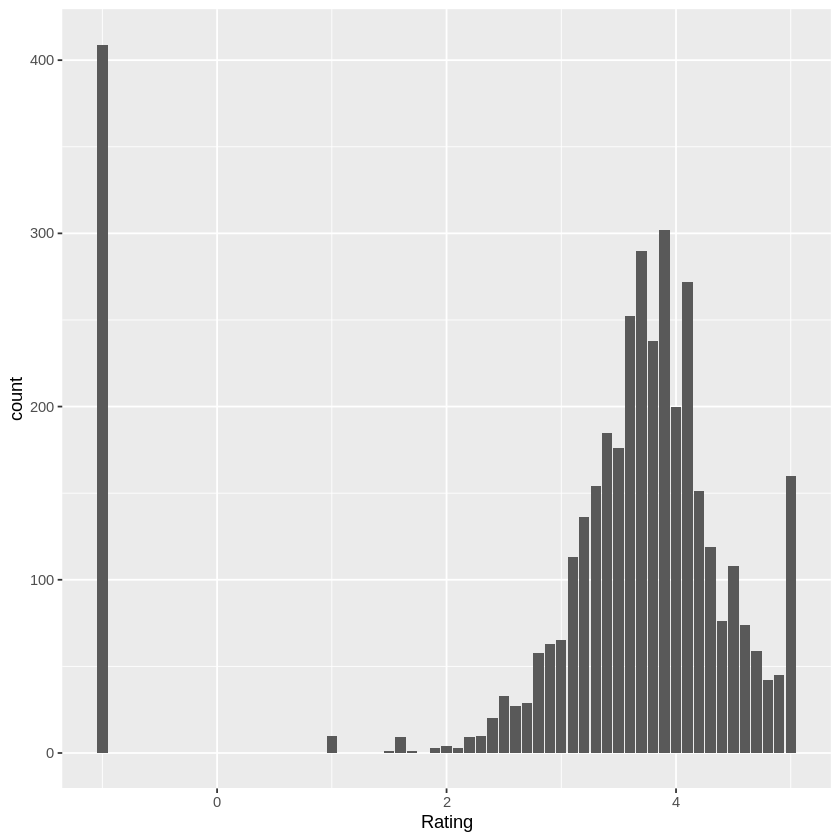

Warning message:
“Removed 993 rows containing non-finite values (`stat_count()`).”


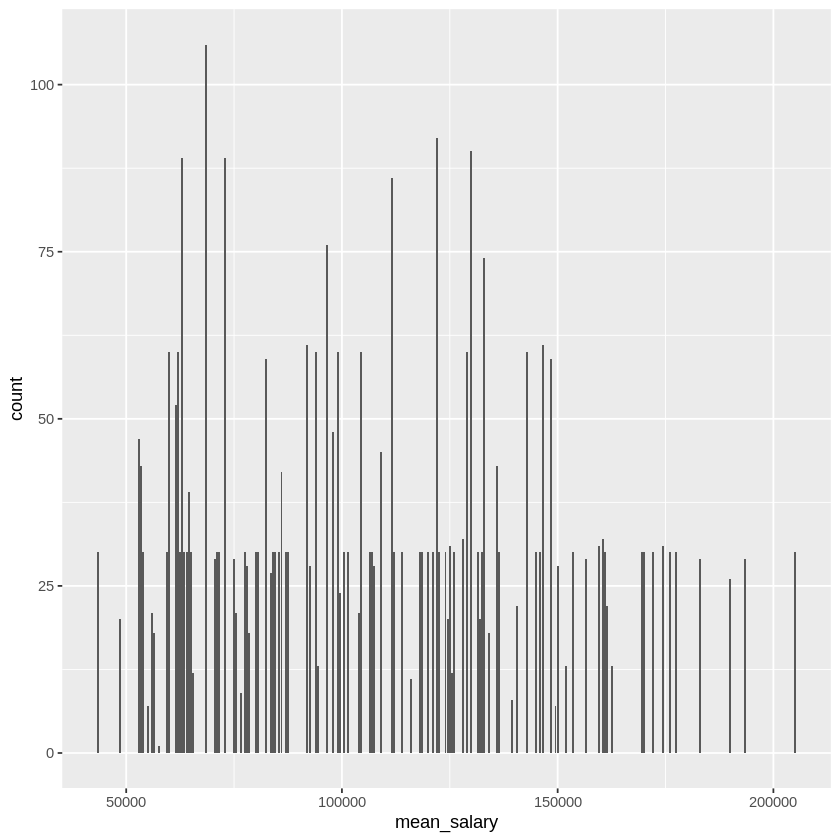

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Sector' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

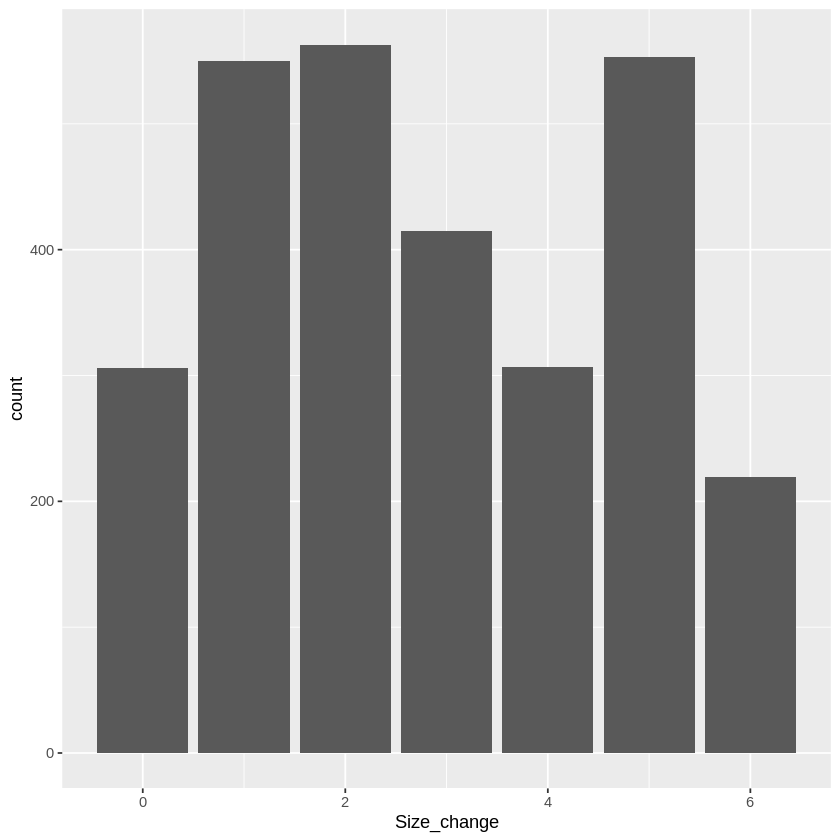


	Pearson's product-moment correlation

data:  data3$mean_salary and data3$Size_change
t = -1.7166, df = 2859, p-value = 0.08617
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.068651897  0.004564051
sample estimates:
        cor 
-0.03208697 



	Pearson's product-moment correlation

data:  data3$mean_salary and data3$Sector_change
t = -1.0028, df = 3827, p-value = 0.316
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04785985  0.01547551
sample estimates:
        cor 
-0.01620843 



	Pearson's product-moment correlation

data:  data3$mean_salary and data3$easyapply_change
t = 5.2352, df = 3827, p-value = 1.737e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05278973 0.11569170
sample estimates:
       cor 
0.08432472 


,Job.Title,Rating,easyapply_change,mean_salary,Size_change,Location_change,Sector_change
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Senior Data Scientist,3.5,0,146000,4,1,3
2,"Data Scientist, Product Analytics",4.5,0,146000,5,1,3
3,Data Science Manager,-1.0,1,146000,1,1,3
4,Data Analyst,3.4,0,146000,3,2,3
5,"Director, Data Science",3.4,0,146000,2,1,3
6,Data Scientist,2.9,0,146000,3,1,3
7,Quantitative Researcher,4.4,0,146000,2,1,3
8,Quantitative Research Associate,-1.0,1,146000,1,1,3
9,AI Scientist,5.0,1,146000,1,1,3


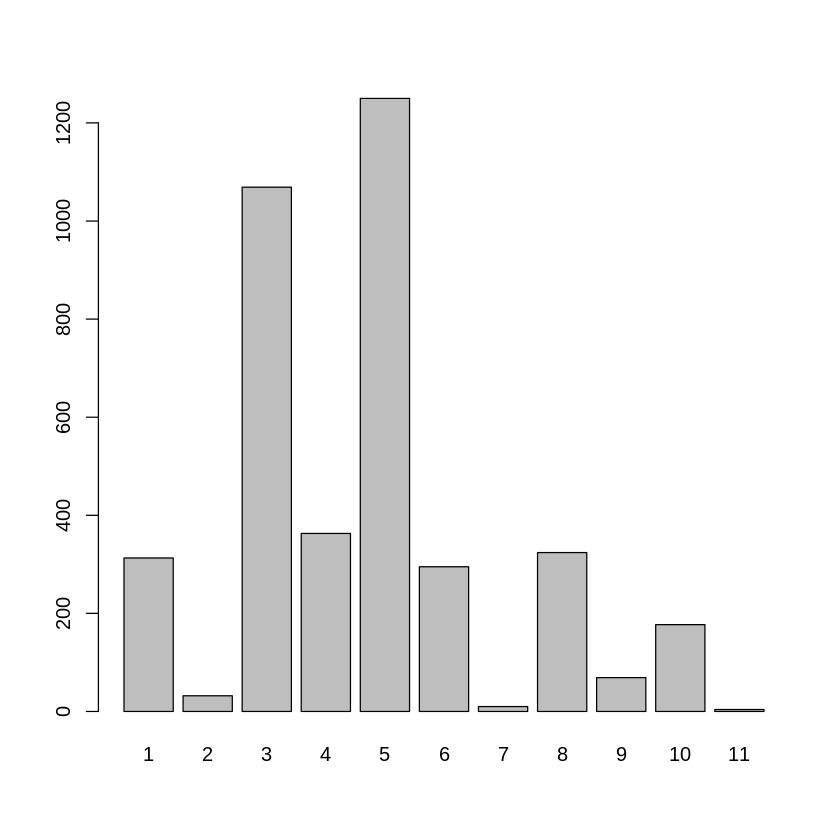

In [ ]:
# EDA & visualization part

data3<-select(data2,Job.Title,Rating,easyapply_change,mean_salary,Size_change,Location_change,Sector_change)

# 分佈成常態但rating=-1太多，會傾向回去找源頭，但在這裡會選擇不放入模型
ggplot(data3,aes(x=Rating))+geom_bar()     

# 薪資多分布在73000 and 130000附近
ggplot(data3,aes(x=mean_salary))+geom_bar()   

# 公司多為萬人以上
ggplot(data3,aes(x=Size_change))+geom_bar()  

# 職位多為IT部門
ggplot(data3,aes(x=Sector))+geom_bar()  

# 工作聚集城市
barplot(table(data3$Location_change))    

# 公司大小和薪水沒到顯著關係
cor.test(data3$mean_salary,data3$Size_change)   

# 產業類別和薪水沒到顯著關係
cor.test(data3$mean_salary,data3$Sector_change)  

#easy apply和薪水呈顯著關係
cor.test(data3$mean_salary,data3$easyapply_change) 
View(data3)

# 輸出做dashboard,檔案放在附件中
write.csv(data3,"data3.csv")

In [ ]:
# split data to train and test
# 去掉job title
data3<-subset(data3,select=-Job.Title)
sample<-sample.split(data3,SplitRatio=0.7)
train<-subset(data3,sample==T)
test<-subset(data3,sample==F)

In [ ]:
# linear model
model<-lm(mean_salary~.,data=train)
summary(model)


Call:
lm(formula = mean_salary ~ ., data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-78155 -25018  -2322  24997 109809 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      163579.2     9956.0  16.430  < 2e-16 ***
Rating             1276.7      471.9   2.705  0.00689 ** 
easyapply_change   9414.6     3380.6   2.785  0.00541 ** 
Size_change       -1518.7      462.3  -3.285  0.00104 ** 
Location_change   -6529.9      367.4 -17.772  < 2e-16 ***
Sector_change     -9383.9     3222.1  -2.912  0.00363 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33750 on 1893 degrees of freedom
  (705 observations deleted due to missingness)
Multiple R-squared:  0.1572,	Adjusted R-squared:  0.155 
F-statistic: 70.64 on 5 and 1893 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



	Shapiro-Wilk normality test

data:  res
W = 0.98772, p-value = 1.179e-11


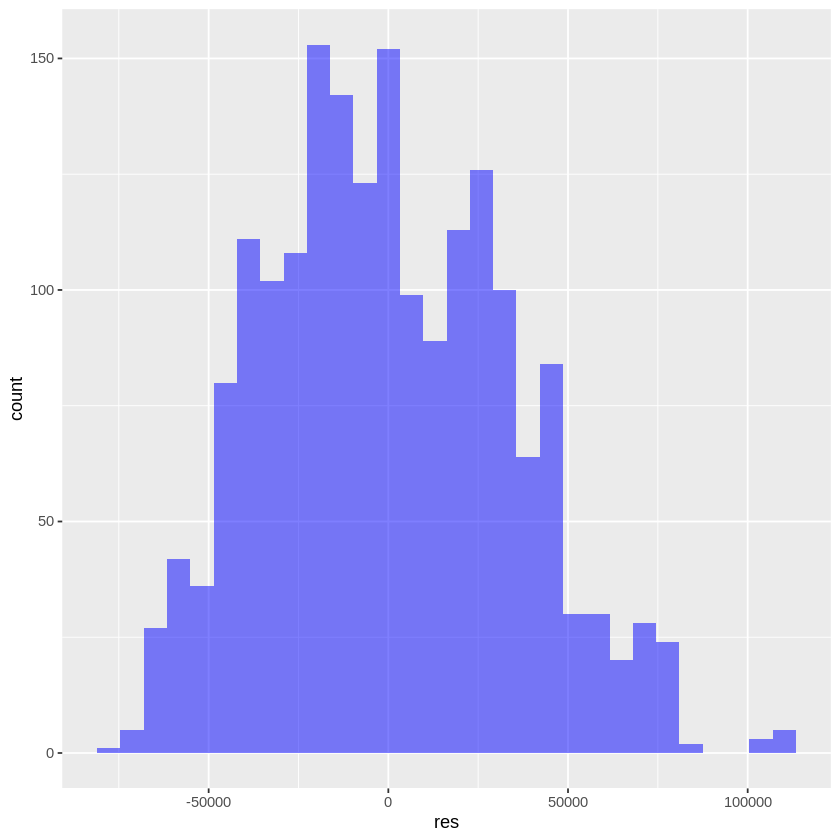

In [ ]:
# 殘差表現
res<-residuals(model)
pl<-ggplot(as.data.frame(res),aes(x=res))+geom_histogram(fill="blue",alpha=0.5)
pl
# 殘差成常態分佈
shapiro.test(res) 

In [ ]:
# 預測
prediction<-predict(model,test)
result<-cbind(round(prediction,0),test$mean_salary)
colnames(result)<-c('pred','real')
result<-as.data.frame(result)
result

,pred,real
,<dbl>,<dbl>
3,135517,146000
5,130201,146000
9,143177,146000
11,138735,146000
15,126922,146000
17,127419,146000
21,NA,146000
23,129576,146000
27,126539,146000
